In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
#path and the files with sci
path = '/Users/varungandhi/Downloads/python_notebooks/'
#jan to march
file1_jan = path + 'ceilo1_jan.csv'
file1_feb = path + 'ceilo1_feb.csv'
file1_mar = path + 'ceilo1_mar.csv'

file2_jan = path + 'ceilo2_jan.csv'
file2_feb = path + 'ceilo2_feb.csv'
file2_mar = path + 'ceilo2_mar.csv'

#oct to nov
file1_oct = path + 'ceilo1_oct.csv'
file1_nov = path + 'ceilo1_nov.csv'
file1_dec = path + 'ceilo1_dec.csv'


file2_oct = path + 'ceilo2_oct.csv'
file2_nov = path + 'ceilo2_nov.csv'
file2_dec = path + 'ceilo2_dec.csv'

omsz_path = '/Volumes/Seagate Backup Plus Drive/data_1/Data_OMSZ_10min.pkl'
df_omsz = pd.read_pickle(omsz_path)
df_omsz['idő (UTC)'] = pd.to_datetime(df_omsz['idő (UTC)'])
df_oct_dec = df_omsz[(df_omsz['idő (UTC)'] >= '2020-10-1 00:00:00') & 
                     (df_omsz['idő (UTC)'] <= '2020-12-31 23:50:00')]

df_jan_mar = df_omsz[(df_omsz['idő (UTC)'] >= '2021-01-1 00:00:00') & 
                     (df_omsz['idő (UTC)'] <= '2021-03-30 23:50:00')]

df_apr_may = df_omsz[(df_omsz['idő (UTC)'] >= '2021-04-1 00:00:00') & 
                     (df_omsz['idő (UTC)'] <= '2021-05-16 23:50:00')]


df_oct_dec['net'] = df_oct_dec['SR'] + df_oct_dec['SAL'] - df_oct_dec['SREF'] - df_oct_dec['SSUL']
df_jan_mar['net'] = df_jan_mar['SR'] + df_jan_mar['SAL'] - df_jan_mar['SREF'] - df_jan_mar['SSUL']
df_oct_dec['longwave_net'] = df_oct_dec['SAL'] - df_oct_dec['SSUL']
df_jan_mar['longwave_net'] = df_jan_mar['SAL'] - df_jan_mar['SSUL']


In [219]:
def visibility(data_frame,lower_value, upper_value,value):
    list_empty = []
    for i in range(data_frame.index[0], data_frame.index[-1] +1):
        if data_frame['V'][i] >= lower_value and data_frame['V'][i] < upper_value:
            list_empty.append(value)
        
        else:
            list_empty.append(float('NAN'))
            
    return list_empty

def relative_humidity(data_frame,lower_value,value):
    list_empty = []
    for i in range(data_frame.index[0], data_frame.index[-1] +1):
        if data_frame['U'][i] >= lower_value:
            list_empty.append(value)
        
        else:
            list_empty.append(float('NAN'))
            
    return list_empty
Vis_1000 = visibility(df_oct_dec,0, 1000, 10)
Vis_2000 = visibility(df_oct_dec,0, 2000, 30)
Vis_5000 = visibility(df_oct_dec,0, 5000, 30)

Vis_j1000 = visibility(df_jan_mar,0, 1000, 10)
Vis_j2000 = visibility(df_jan_mar,0, 2000, 30)
Vis_j5000 = visibility(df_jan_mar,0, 5000, 30)

h_95 = relative_humidity(df_oct_dec,95, 70)
h_100 =relative_humidity(df_oct_dec,98, 90)


h_j95 = relative_humidity(df_jan_mar,95, 70)

h_j100 = relative_humidity(df_jan_mar,98, 90)
df_oct_dec['Vis_1000'] = Vis_1000
df_oct_dec['Vis_2000'] = Vis_2000
df_oct_dec['Vis_5000'] = Vis_5000

df_oct_dec['h95'] = h_95
df_oct_dec['h100'] = h_100


df_jan_mar['Vis_1000'] = Vis_j1000
df_jan_mar['Vis_2000'] = Vis_j2000
df_jan_mar['Vis_5000'] = Vis_j5000
df_jan_mar['h95'] = h_j95
df_jan_mar['h100'] = h_j100

In [220]:
#january to march
j_1 = pd.read_csv(file1_jan)
f_1 = pd.read_csv(file1_feb)
m_1 = pd.read_csv(file1_mar)

j_2 = pd.read_csv(file2_jan)
f_2 = pd.read_csv(file2_feb)
m_2 = pd.read_csv(file2_mar)

#october to november
o_1 = pd.read_csv(file1_oct)
n_1 = pd.read_csv(file1_nov, sep = ';')
d_1 = pd.read_csv(file1_dec, sep = ';')

o_2 = pd.read_csv(file2_oct)
n_2 = pd.read_csv(file2_nov, sep = ';')
d_2 = pd.read_csv(file2_dec, sep = ';')

n_1['time'] = pd.to_datetime(n_1['time'])
d_1['time'] = pd.to_datetime(d_1['time'])

n_2['time'] = pd.to_datetime(n_2['time'])
d_2['time'] = pd.to_datetime(d_2['time'])

j_m_1 = pd.concat([j_1, f_1, m_1], axis = 0, ignore_index= True)
j_m_2 = pd.concat([j_2, f_2, m_2], axis = 0, ignore_index= True)

n_d_1 = pd.concat([o_1,n_1, d_1], axis = 0, ignore_index= True)
n_d_2 = pd.concat([o_2,n_2, d_2], axis = 0, ignore_index= True)
df_1m = pd.read_pickle('/Volumes/Seagate Backup Plus Drive/data_1/Data_ELTE_1min.pkl')
df_garden = pd.read_pickle('/Volumes/Seagate Backup Plus Drive/data_1/Data_BME_garden.pkl')

# for january to 11 march only 
df_1j_m = df_1m[(df_1m['TIMESTAMP'] >= '2021-01-01 00:00:00') & (df_1m['TIMESTAMP'] <= '2021-03-31 23:59:00')]
df_2j_m = df_garden[(df_garden['TIMESTAMP_UTC'] >= '2021-01-01 00:00:00') & (df_garden['TIMESTAMP_UTC'] <= '2021-03-31 23:59:00')]

# for 20 nov to dec
df_1n_d = df_1m[(df_1m['TIMESTAMP'] >= '2020-10-01 00:00:00') & (df_1m['TIMESTAMP'] <= '2020-12-31 23:59:00')]
df_2n_d = df_garden[(df_garden['TIMESTAMP_UTC'] >= '2020-10-01 00:00:00') & (df_garden['TIMESTAMP_UTC'] <= '2020-12-31 23:59:00')]


In [221]:
## for january to march ## renaming columns
xj_m = df_1j_m[['TIMESTAMP','rh_Avg(1)','rh_Avg(2)', 'temp_Avg(1)', 'temp_Avg(2)']]
yj_m = df_2j_m[['TIMESTAMP_UTC','RH1_corr_cut', 'RH_2_corr_cut', 'AirTC_1_Avg', 'AirTC_2_Avg']]

#for nov to dec  ## renaming columns
xn_d = df_1n_d[['TIMESTAMP','rh_Avg(1)','rh_Avg(2)', 'temp_Avg(1)', 'temp_Avg(2)']]
yn_d = df_2n_d[['TIMESTAMP_UTC','RH1_corr_cut', 'RH_2_corr_cut', 'AirTC_1_Avg', 'AirTC_2_Avg']]

xn_d = xn_d.rename(columns={'TIMESTAMP': 'TIMESTAMP_UTC'})
xj_m = xj_m.rename(columns={'TIMESTAMP': 'TIMESTAMP_UTC'})

xj_m.reset_index(inplace= True)
yj_m.reset_index(inplace = True)

xn_d.reset_index(inplace= True)
yn_d.reset_index(inplace = True)

zj_m_1 = j_m_1[['time','bcc', 'cho', 'nn1', 'nn2', 'nn3','sci']]
zn_d_1 = n_d_1[['time','bcc', 'cho', 'nn1', 'nn2', 'nn3','sci']]

zj_m_2 = j_m_2[['pbl_l1', 'pbl_l2', 'pbl_l3', 'pbs_l1', 'pbs_l2', 'pbs_l3',
       'cbh_l1', 'cbh_l2', 'cbh_l3', 'cbe_l1', 'cbe_l2', 'cbe_l3', 'cdp_l1',
       'cdp_l2', 'cdp_l3', 'cde_l1', 'cde_l2', 'cde_l3']]
zn_d_2 = n_d_2[['pbl_l1', 'pbl_l2', 'pbl_l3', 'pbs_l1', 'pbs_l2', 'pbs_l3',
       'cbh_l1', 'cbh_l2', 'cbh_l3', 'cbe_l1', 'cbe_l2', 'cbe_l3', 'cdp_l1',
       'cdp_l2', 'cdp_l3', 'cde_l1', 'cde_l2', 'cde_l3']]

zj_m = pd.concat([zj_m_1, zj_m_2], axis = 1, ignore_index= False)
zn_d = pd.concat([zn_d_1, zn_d_2], axis = 1, ignore_index= False)
#zn_d

zj_m.reset_index(inplace= True, drop= True)
zn_d.reset_index(inplace= True, drop= True)

#zj_m = zj_m.rename(columns={'time': 'TIMESTAMP_UTC'})

zj_m['time'] = pd.to_datetime(zj_m['time'])
zn_d['time'] = pd.to_datetime(zn_d['time'])
zn_d = zn_d.rename(columns={'time': 'TIMESTAMP_UTC'})

j_m = pd.merge(xj_m,yj_m,on='TIMESTAMP_UTC',how = 'inner')
j_m = pd.concat([j_m,zj_m],axis = 1,ignore_index= False)

zn_d['TIMESTAMP_UTC'] = pd.to_datetime(zn_d['TIMESTAMP_UTC'])
n_d = pd.merge(xn_d,yn_d,on='TIMESTAMP_UTC', how = 'left')
n_d = pd.merge(n_d,zn_d,on='TIMESTAMP_UTC', how = 'right')

In [222]:
x = j_m['sci'].values
y = j_m['RH_2_corr_cut'].values
z = j_m['rh_Avg(1)'].values

x1 = n_d['sci'].values
y1 = n_d['RH_2_corr_cut'].values
z1 = n_d['rh_Avg(1)'].values

def sci(x, lower_value,value):
    ll = []
    for i in range(len(x)):
        if x[i] ==lower_value:
            ll.append(value)
        else:
            ll.append(float('NAN'))
            
    return ll

def relative_humidity(x,lower_value,value):
    list_empty = []
    for i in range(len(x)):
        if x[i] >= lower_value:
            list_empty.append(value)
        
        else:
            list_empty.append(float('NAN'))
            
    return list_empty

h95 = relative_humidity(y, 95,40)
h100 = relative_humidity(y, 97,50)
h95_24 = relative_humidity(z, 95,60)
h100_24 = relative_humidity(z, 97,70)


j_m['h95']  = h95
j_m['h100'] = h100
j_m['h95_24'] = h95_24
j_m['h100_24'] = h100_24

rain = sci(x, 1.0,20.0)
fog = sci(x, 2.0,10.0)
snow = sci(x, 3.0,30.0)
#sci2 = sci(x,a = 1.0, b= 2.0, c= 3.0)

j_m['rain'] = rain
j_m['fog'] = fog
j_m['snow'] = snow

h95 = relative_humidity(y1, 95,40)
h100 = relative_humidity(y1, 98,50)
h95_24 = relative_humidity(z1, 95,60)
h100_24 = relative_humidity(z1, 98,70)

n_d['h95']  = h95
n_d['h100'] = h100
n_d['h95_24'] = h95_24
n_d['h100_24'] = h100_24


rain = sci(x1, 1.0,20)
fog = sci(x1, 2.0,10)
snow = sci(x1, 3.0,30)

n_d['rain'] = rain
n_d['fog'] = fog
n_d['snow'] = snow

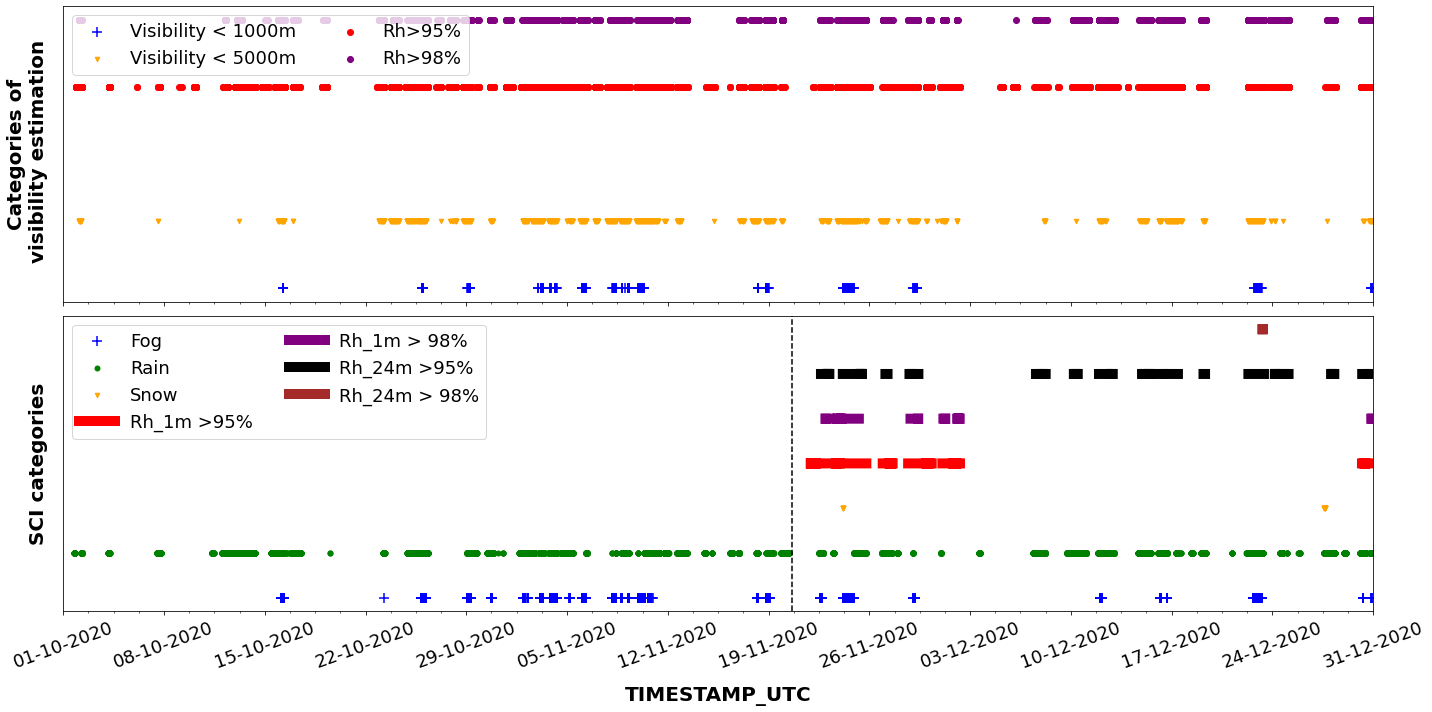

In [223]:
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (20,10),sharex= True)

left = dt.date(2020, 10, 1)
right =dt.date(2020, 12, 31)
ax2.axvline(x = n_d['TIMESTAMP_UTC'][72120], linestyle = '--',color = 'black')
ax1.scatter(df_oct_dec['idő (UTC)'],df_oct_dec['Vis_1000'], label = 'Visibility < 1000m',color = 'b',marker = '+',s = 100)
#ax1.scatter(df_oct_dec['idő (UTC)'],df_oct_dec['Vis_2000'], label = 'Visibility < 2000m',color = 'g',marker = '.',s = 100)
ax1.scatter(df_oct_dec['idő (UTC)'],df_oct_dec['Vis_5000'], label = 'Visibility < 5000m',color = 'orange',marker = 'v',s = 20)
ax1.scatter(df_oct_dec['idő (UTC)'],df_oct_dec['h95'], label = 'Rh>95%',color = 'red')
ax1.scatter(df_oct_dec['idő (UTC)'],df_oct_dec['h100'],label = 'Rh>98%',color = 'purple')
ax1.legend(loc= 'upper left', prop={'size': 18}, ncol = 2)
ax1.set_ylabel('Categories of\n visibility estimation', fontsize=20, labelpad =15,fontweight='bold')


ax2.scatter(n_d['TIMESTAMP_UTC'],n_d['fog'], label = 'Fog', color = 'b', marker = '+', s = 100)
ax2.scatter(n_d['TIMESTAMP_UTC'],n_d['rain'],label = 'Rain',color = 'g', marker = '.', s = 100)
ax2.scatter(n_d['TIMESTAMP_UTC'],n_d['snow'],label = 'Snow',color = 'orange', marker = 'v', s= 20)

ax2.plot(n_d['TIMESTAMP_UTC'],n_d['h95'], label = 'Rh_1m >95%', color = 'red', linewidth = 10)
ax2.plot(n_d['TIMESTAMP_UTC'],n_d['h100'], label = 'Rh_1m > 98%', color = 'purple', linewidth = 10)
ax2.plot(n_d['TIMESTAMP_UTC'],n_d['h95_24'], label = 'Rh_24m >95%', color = 'black', linewidth = 10)
ax2.plot(n_d['TIMESTAMP_UTC'],n_d['h100_24'], label = 'Rh_24m > 98%', color = 'brown', linewidth = 10)

ax2.set_ylabel('SCI categories', fontsize=20, labelpad =15,fontweight='bold')
ax2.set_xlabel('TIMESTAMP_UTC', fontsize= 20, labelpad = 15,fontweight='bold')
ax2.legend(loc= 'upper left', prop={'size': 18}, ncol = 2)

#axis parameters
for axs in (ax1,ax2):
    
    axs.tick_params(axis='both', which='major', labelsize=18)
    axs.tick_params(axis='both', which='minor', labelsize=8)
    axs.tick_params(axis='x', labelrotation= 20)

    #axs.set_ylim([10,100])
    #axs.set_yticks(np.arange(0,81,20))
    axs.axes.yaxis.set_ticks([])
    
    
    axs.minorticks_on()
    axs.set_xbound(left, right)
    axs.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
    axs.xaxis.set_major_locator(DayLocator(interval= 7))
    
#ax1.margins(x=0.05)
#ax2.margins(x=0.046)




fig.tight_layout()


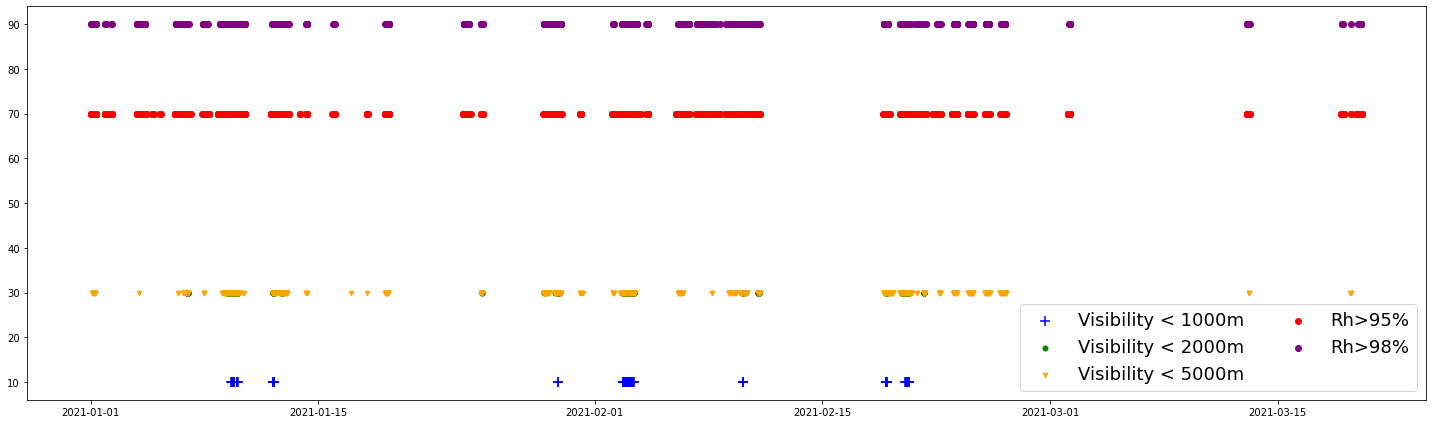

In [224]:
fig,ax1 = plt.subplots(1,1,figsize = (20,6))
ax1.scatter(df_jan_mar['idő (UTC)'],df_jan_mar['Vis_1000'], label = 'Visibility < 1000m',color = 'b',marker = '+',s = 100)
ax1.scatter(df_jan_mar['idő (UTC)'],df_jan_mar['Vis_2000'], label = 'Visibility < 2000m',color = 'g',marker = '.',s = 100)
ax1.scatter(df_jan_mar['idő (UTC)'],df_jan_mar['Vis_5000'], label = 'Visibility < 5000m',color = 'orange',marker = 'v',s = 20)
ax1.scatter(df_jan_mar['idő (UTC)'],df_jan_mar['h95'], label = 'Rh>95%',color = 'red')
ax1.scatter(df_jan_mar['idő (UTC)'],df_jan_mar['h100'],label = 'Rh>98%',color = 'purple')
ax1.legend(loc= 'lower right', prop={'size': 18}, ncol = 2)
ax2.legend(loc= 'lower right', prop={'size': 18}, ncol = 2)
fig.tight_layout()


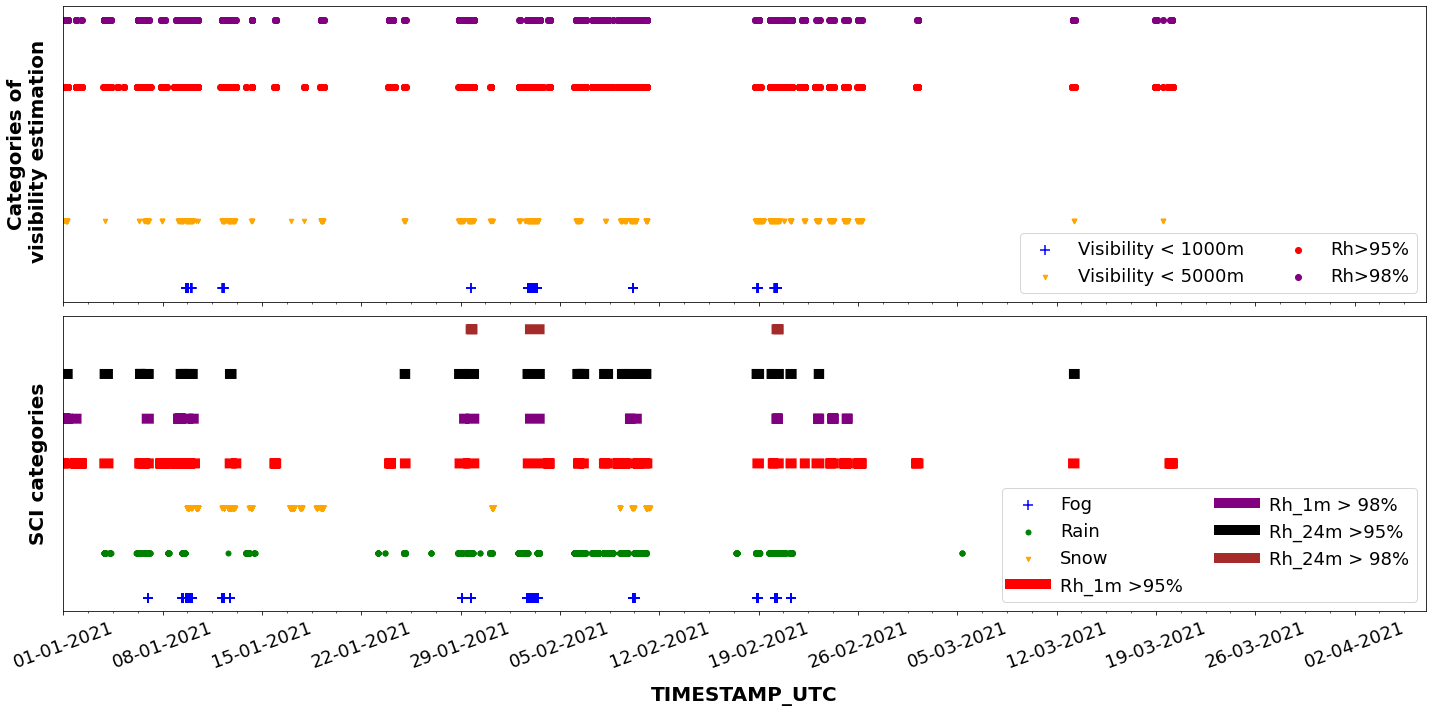

In [230]:
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (20,10),sharex= True)

left = dt.date(2021, 1, 1)
right =dt.date(2021, 4, 7)
ax2.scatter(j_m['TIMESTAMP_UTC'],j_m['fog'], label = 'Fog', color = 'b', marker = '+', s = 100)
ax2.scatter(j_m['TIMESTAMP_UTC'],j_m['rain'],label = 'Rain',color = 'g', marker = '.', s = 100)
ax2.scatter(j_m['TIMESTAMP_UTC'],j_m['snow'],label = 'Snow',color = 'orange', marker = 'v', s= 20)

ax2.plot(j_m['TIMESTAMP_UTC'],j_m['h95'], label = 'Rh_1m >95%', color = 'red', linewidth = 10)
ax2.plot(j_m['TIMESTAMP_UTC'],j_m['h100'], label = 'Rh_1m > 98%', color = 'purple', linewidth = 10)
ax2.plot(j_m['TIMESTAMP_UTC'],j_m['h95_24'], label = 'Rh_24m >95%', color = 'black', linewidth = 10)
ax2.plot(j_m['TIMESTAMP_UTC'],j_m['h100_24'], label = 'Rh_24m > 98%', color = 'brown', linewidth = 10)


ax1.scatter(df_jan_mar['idő (UTC)'],df_jan_mar['Vis_1000'], label = 'Visibility < 1000m',color = 'b',marker = '+',s = 100)
#ax1.scatter(df_jan_mar['idő (UTC)'],df_jan_mar['Vis_2000'], label = 'Visibility < 2000m',color = 'g',marker = '.',s = 100)
ax1.scatter(df_jan_mar['idő (UTC)'],df_jan_mar['Vis_5000'], label = 'Visibility < 5000m',color = 'orange',marker = 'v',s = 20)
ax1.scatter(df_jan_mar['idő (UTC)'],df_jan_mar['h95'], label = 'Rh>95%',color = 'red')
ax1.scatter(df_jan_mar['idő (UTC)'],df_jan_mar['h100'],label = 'Rh>98%',color = 'purple')

ax1.legend(loc= 'lower right', prop={'size': 18}, ncol = 2)
ax2.legend(loc= 'lower right', prop={'size': 18}, ncol = 2)


ax1.set_ylabel('Categories of\n visibility estimation', fontsize=20, labelpad =15,fontweight='bold')
ax2.set_ylabel('SCI categories', fontsize=20, labelpad =15,fontweight='bold')
ax2.set_xlabel('TIMESTAMP_UTC', fontsize= 20, labelpad = 15,fontweight='bold')



#axis parameters
for axs in (ax1,ax2):
#    
    axs.tick_params(axis='both', which='major', labelsize=18)
    axs.tick_params(axis='both', which='minor', labelsize=8)
    axs.tick_params(axis='x', labelrotation= 20)
#

    axs.axes.yaxis.set_ticks([])
#    
    
    axs.minorticks_on()
    axs.set_xbound(left, right)
    axs.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
    axs.xaxis.set_major_locator(DayLocator(interval= 7))
    


fig.tight_layout()

